### Initialize

In [1]:
from __future__ import print_function, division
%matplotlib inline
from matplotlib import pyplot as plt
import json
import random
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding
from debiaswe.debias import debias

# Standard python helper libraries.
import os, sys, re, json, time
import itertools, collections
#from importlib import reload
from IPython.display import display

# NumPy and SciPy for matrix ops
import numpy as np
import scipy.sparse

# Visualize
import matplotlib.pyplot as plt

# NLTK for NLP utils
import nltk

# PCA 
from sklearn.decomposition import PCA

# Helper libraries
from w266_common import utils, vocabulary#, tf_embed_viz

## PCA

In [23]:
# load subset of word embedding trained on Google News text
E_gn = WordEmbedding("./embeddings/w2v_gnews_small.txt")
E_jp = WordEmbedding("./embeddings/article_embed.txt")

*** Reading data from ./embeddings/w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
*** Reading data from ./embeddings/article_embed.txt
(462643, 50)
462643 words of dimension 50 : the, to, of, and, ..., sadaoui, craythorn, calcraft, coventon
462643 words of dimension 50 : the, to, of, and, ..., sadaoui, craythorn, calcraft, coventon


In [35]:
def subspace(e,wds):
    
    matrix = []

    for a,b in wds:
        center = (e.v(a) + e.v(b)) / 2
        matrix.append(e.v(a) - center)
        matrix.append(e.v(b) - center)
    matrix = np.array(matrix)
    return matrix

### Load Data

In [4]:
with open('./data/definitional_pairs_gender.json', "r") as f:
    definitional_g = json.load(f) # no Mary and John
    
with open('./data/definitional_pairs_political.json', "r") as f:
    definitional_p = json.load(f) # no left-wing and right-wing

### Gender PCA

In [24]:
pca = PCA(n_components=10)

In [52]:
# difference vecs for GN we
diffs = subspace(E_gn, definitional_p)

In [49]:
diffs.shape

(12, 300)

In [56]:
# difference vecs for JP we
diffs = subspace(E_jp, definitional_p)

In [57]:
result = pca.fit_transform(diffs)

In [41]:
result.shape 

(18, 10)

In [58]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[  4.00894493e-01   2.22549096e-01   1.68505445e-01   1.13265537e-01
   6.12611212e-02   3.35242823e-02   5.04770735e-15   3.16221370e-15
   2.42068443e-15   1.56190991e-15]
0.999999973923


<Container object of 10 artists>

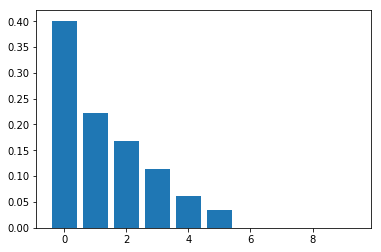

In [145]:
plt.bar(range(10),pca.explained_variance_ratio_)

In [282]:
# simulate random draws
v = []
n = 1000

unit_vecs = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, E.vecs)

for i in range(n):
    v.append(random.sample(unit_vecs, 10)) 
    
avg = np.mean(v,axis=0)

In [283]:
result = pca.fit_transform(avg)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

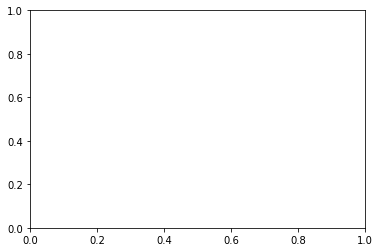

In [137]:
plt.bar(range(result.shape[0]),pca.explained_variance_ratio_)

## Analogy Eval

In [175]:
with open('./evaluation/analogies.json', "r") as f:
    analogies = json.load(f) 

In [176]:
analogies[:5]

[[u'athens', u'greece', u'baghdad', u'iraq'],
 [u'athens', u'greece', u'bangkok', u'thailand'],
 [u'athens', u'greece', u'beijing', u'china'],
 [u'athens', u'greece', u'berlin', u'germany'],
 [u'athens', u'greece', u'bern', u'switzerland']]

In [ ]:

def compare_analogies(analogy_list,we):
    num_analogies = 0
    correct = 0
    for i,wds in enumerate(analogy_list):
        
        # we'll get KeyError if a word can't be found
        try:
            ## generate analogies (check in with AK and JP)
            d = # word generated from a,b,c in 
            # keep track of how many analogies were computed (we may be missing words)
            num_analogies += 1

            if d == wds[3]:
                correct += 1
    
    score = correct / num_analogies
    print(score)
                
    print("Computed {:d} analogies, accuracy: {:.2f}".format(num_analogies,score)